In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
gdp_df.shape

(8219, 4)

In [8]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df_no_end = gdp_df.drop(columns = ['Value Footnotes'])

In [11]:
gdp_df_re = gdp_df_no_end.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df_re

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [13]:
gdp_years = gdp_df_re.Country.value_counts()
gdp_years

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [15]:
gdp_2020 = gdp_df_re.loc[gdp_df_re.Year == 2020].reset_index()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

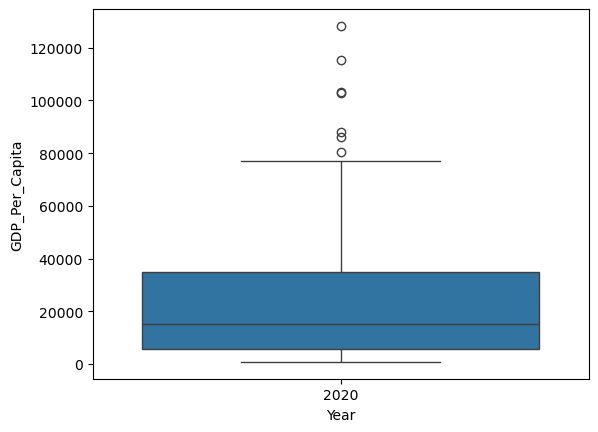

In [16]:
##boxplot
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

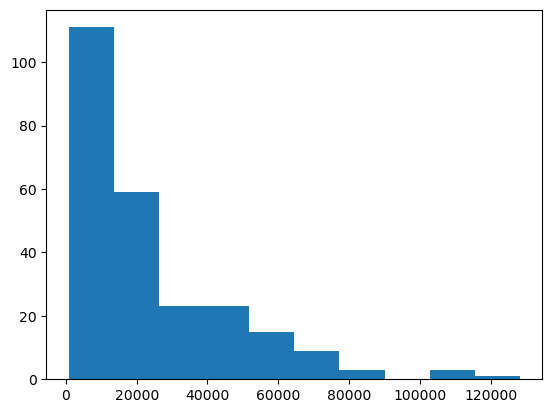

In [17]:
##histogram
plt.hist(gdp_2020.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

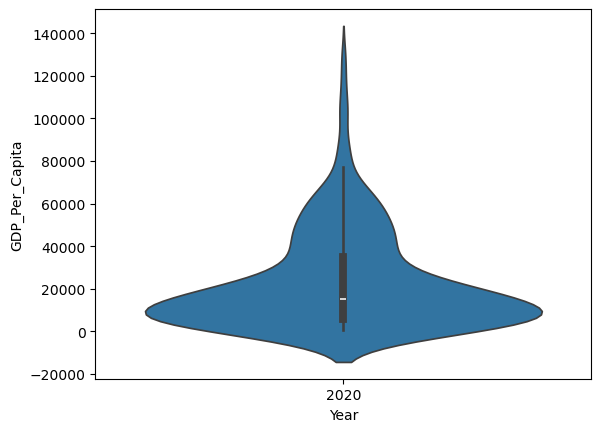

In [18]:
##violin
sns.violinplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

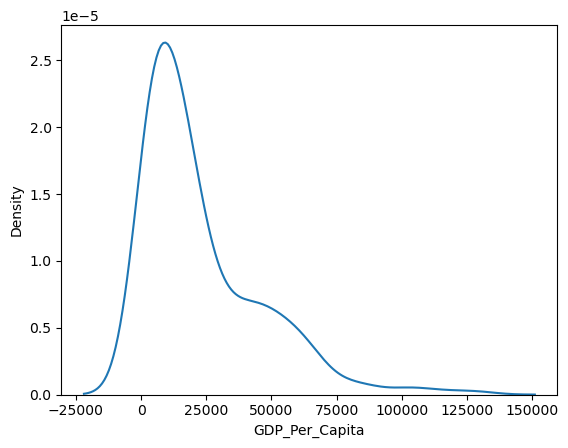

In [19]:
##density plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [21]:
gdp_2020.GDP_Per_Capita.median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [116]:
gdp_2020

,index,Country,Year,GDP_Per_Capita
0,3,Afghanistan,2020,2769.685745
1,27,Africa Eastern and Southern,2020,3861.111238
2,61,Africa Western and Central,2020,4622.731427
3,95,Albania,2020,14650.395929
4,129,Algeria,2020,14194.155748
...,...,...,...,...
242,8068,Virgin Islands,2020,45055.782930
243,8090,West Bank and Gaza,2020,5423.682547
244,8120,World,2020,18600.986362
245,8154,Zambia,2020,3391.595412


<BarContainer object of 247 artists>

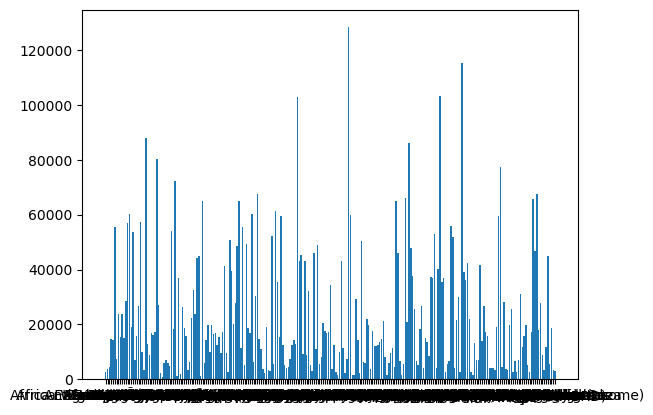

In [106]:
plt.bar(gdp_2020['Country'], gdp_2020['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?